In [1]:
from ClementAnalyse import *

In [15]:
w15 = GammaFits("HauteEnergie/Data/source_observation/lat_photon_weekly_w015_p305_v001.fits")
w15.make_all_slice(200)
w15.plot_all_slice_hist(vmin=0, vmax=5,show=False)
print("DONE")

100%|██████████| 287739/287739 [00:00<00:00, 5000973.12it/s]


Le nombre de slice total désiré ne divise pas le nombre de données.
 Le nombre le plus proche trouvé est : 3013
::	 le nombre d'event par slice est de 191
Création des slice en cours


100%|██████████| 3013/3013 [00:01<00:00, 2491.78it/s]


Calcule de la statistique de toute les slice en cours ...


100%|██████████| 3012/3012 [06:50<00:00,  7.33it/s]

DONE


<Figure size 640x480 with 0 Axes>

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([2.42495723e-03, 1.00240686e+00, 2.00238877e+00, 3.00237067e+00,
        4.00235258e+00, 5.00233448e+00, 6.00231639e+00, 7.00229829e+00,
        8.00228019e+00, 9.00226210e+00, 1.00022440e+01, 1.10022259e+01,
        1.20022078e+01, 1.30021897e+01, 1.40021716e+01, 1.50021535e+01,
        1.60021354e+01, 1.70021173e+01, 1.80020992e+01, 1.90020811e+01,
        2.00020631e+01, 2.10020450e+01, 2.20020269e+01, 2.30020088e+01,
        2.40019907e+01, 2.50019726e+01, 2.60019545e+01, 2.70019364e+01,
        2.80019183e+01, 2.90019002e+01, 3.00018821e+01, 3.10018640e+01,
        3.20018459e+01, 3.30018278e+01, 3.40018097e+01, 3.50017916e+01,
        3.60017735e+01, 3.70017554e+01, 3.80017373e+01, 3.90017192e+01,
        4.00017011e+01, 4.10016

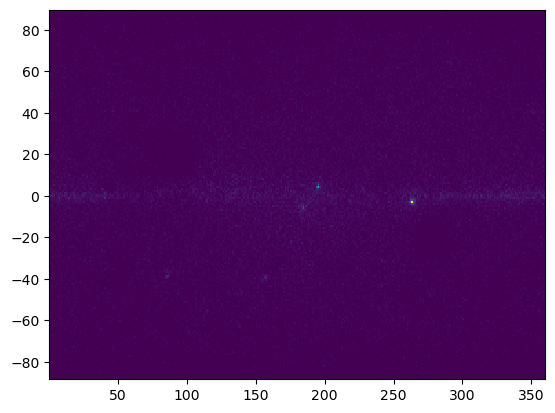

In [6]:
plt.hist2d(w15.L_cut,w15.B_cut,bins=[360, 180])

In [12]:
H,xe,ye=np.histogram2d(w15.L_cut,w15.B_cut,bins=[360, 180])

In [13]:
Xe,Ye=np.meshgrid(xe,ye)

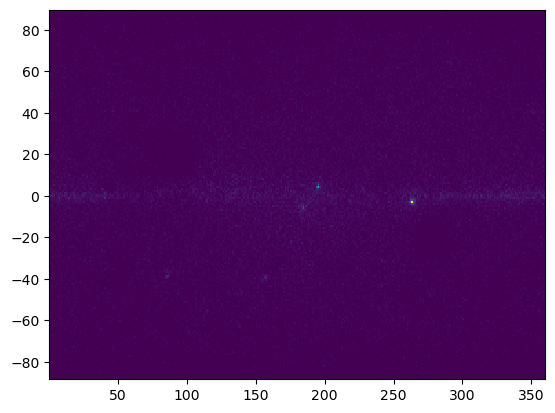

In [15]:
plt.pcolormesh(Xe,Ye,H.T)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([2.42495723e-03, 1.00240686e+00, 2.00238877e+00, 3.00237067e+00,
        4.00235258e+00, 5.00233448e+00, 6.00231639e+00, 7.00229829e+00,
        8.00228019e+00, 9.00226210e+00, 1.00022440e+01, 1.10022259e+01,
        1.20022078e+01, 1.30021897e+01, 1.40021716e+01, 1.50021535e+01,
        1.60021354e+01, 1.70021173e+01, 1.80020992e+01, 1.90020811e+01,
        2.00020631e+01, 2.10020450e+01, 2.20020269e+01, 2.30020088e+01,
        2.40019907e+01, 2.50019726e+01, 2.60019545e+01, 2.70019364e+01,
        2.80019183e+01, 2.90019002e+01, 3.00018821e+01, 3.10018640e+01,
        3.20018459e+01, 3.30018278e+01, 3.40018097e+01, 3.50017916e+01,
        3.60017735e+01, 3.70017554e+01, 3.80017373e+01, 3.90017192e+01,
        4.00017011e+01, 4.10016

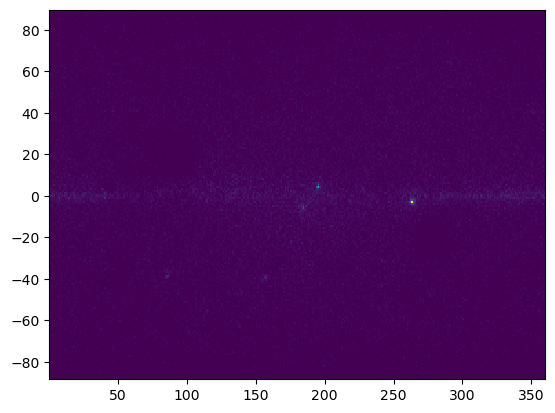

In [16]:
plt.hist2d(w15.L_cut,w15.B_cut,bins=[360, 180])

In [8]:
plt.close("all")

In [9]:
X, Y = np.meshgrid(w15.xedges_tot, w15.yedges_tot)

In [22]:
C =np.atleast_2d(w15.all_counts[:,:,:]) 
C[0]==w15.all_counts[:,:,:].T

/tmp/ipykernel_9245/1281878798.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  C[0]==w15.all_counts[:,:,:].T


False

In [31]:
np.transpose(w15.all_counts[:,:,:],axes=()).shape

ValueError: axes don't match array

In [27]:
C.shape

(809, 180, 360)

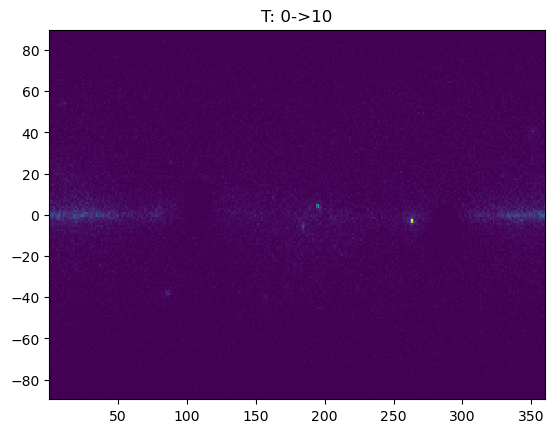

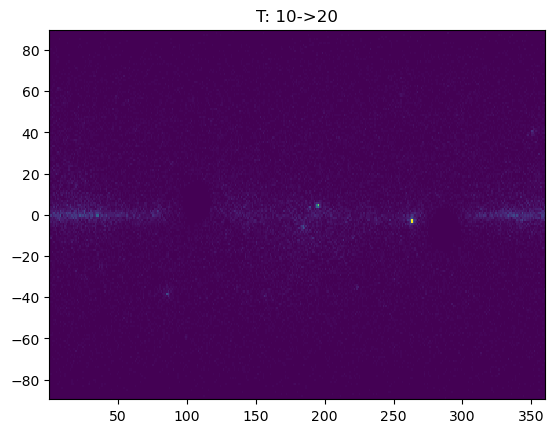

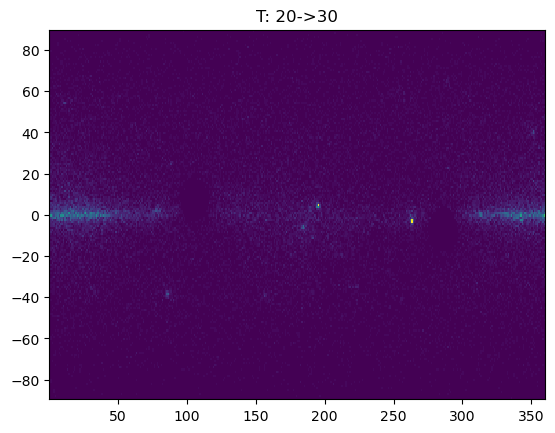

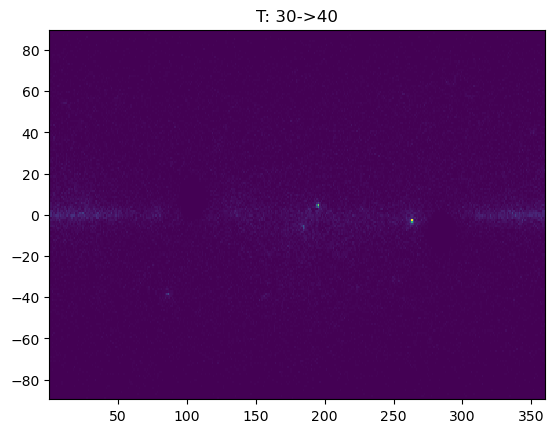

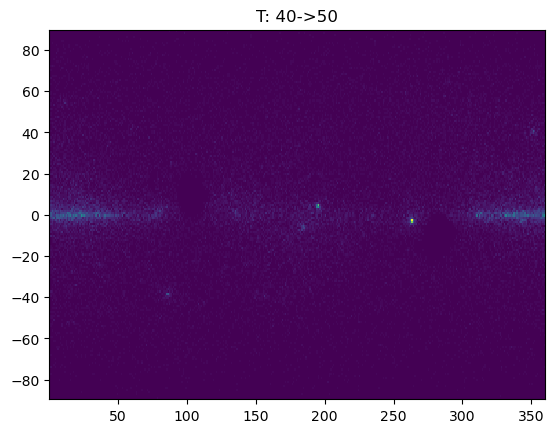

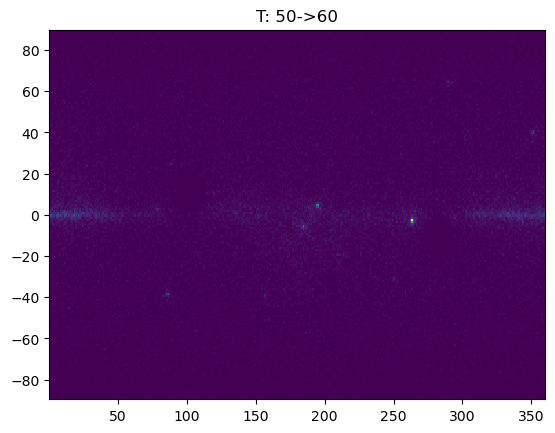

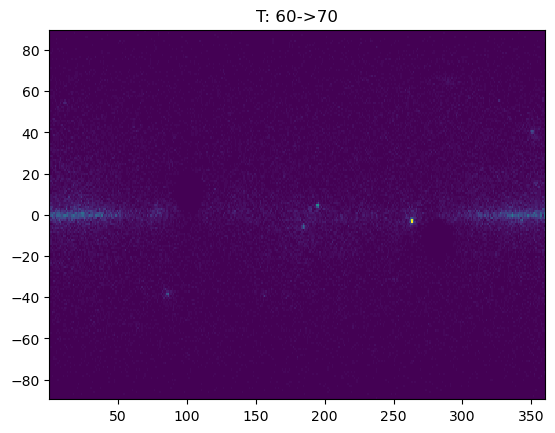

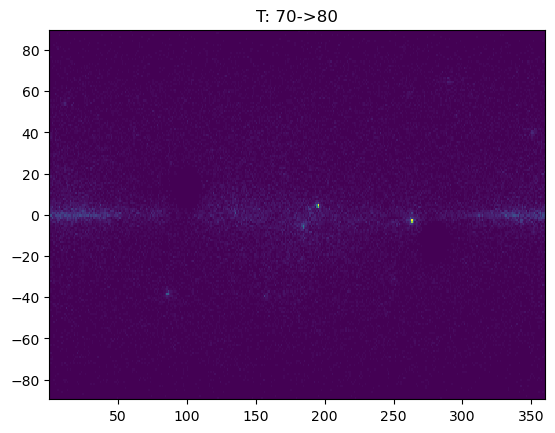

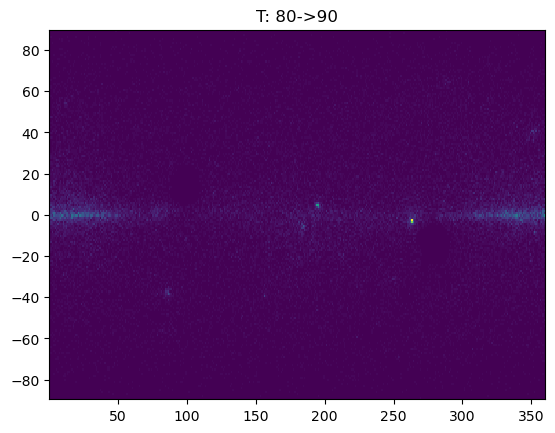

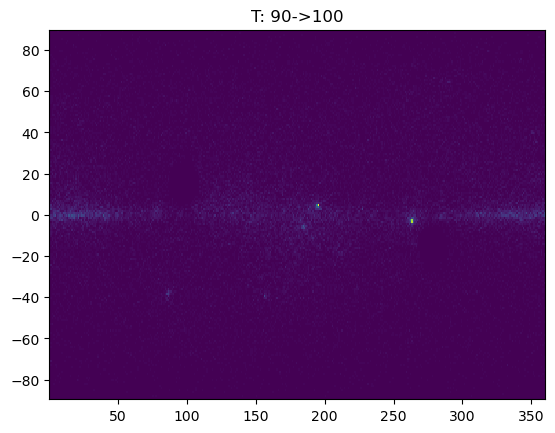

In [14]:
def sumslide(Fits:GammaFits,start,stop,operation=np.sum):
    res=operation(w15.all_counts[:,:,start:stop],axis=2)
    return res
def sumplot(Fits,n,stop,operation=np.sum):
    for i in range(0,stop,n):
        plt.pcolormesh(X,Y,(sumslide(Fits,i,i+n,operation=operation).T))
        plt.title(f"T: {i}->{i+n}")
        plt.show()

sumplot(w15,10,100,operation=np.sum)

In [92]:
w15.all_counts[:,:,0].shape

(360, 180)